## Student Name: Edmundo Fernandes

## Student Number: sbs 23034

## Class Module: Advanced Data & Big Data

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Date of Submission:

## Github Link: https://github.com/Young-Jedi79/Integrated_CA2-MSc

### Data Preparation And Exploratory Data Analysis

#### Import Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import scipy as sc
import matplotlib.animation as animation
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
from matplotlib import pyplot
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.transform import factor_cmap
from dateutil.parser import parse 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf,pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA, ARMA
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

import gensim

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

from textblob import TextBlob
from textblob import TextBlob

import gensim

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import chi2_contingency

### Dataset details:

ids: unique id of the tweet

date:date of the tweet

flag:refers to the query. If no query exists, then it is NO QUERY

user:It refers to the name of the user that tweeted

text:refers to the name of the user that tweeted

sentiment:polarity of the tweet

In [2]:
df = pd.read_csv("ProjectTweets.csv")

<Axes: title={'center': 'ProjectTweets.csv'}>

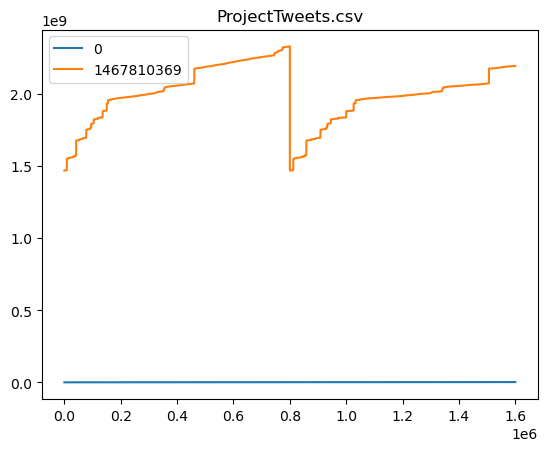

In [3]:
df.plot(title='ProjectTweets.csv')

In [4]:
df.head(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [5]:
df.tail(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
print("Total tweets in the dataset: {} Million".format(df.shape[0]/1000000.0))

Total tweets in the dataset: 1.599999 Million


In [7]:
df.shape

(1599999, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [9]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

I will rename the columns for a clearer visualization

In [10]:
df.rename(columns = {'0': 'index', '1467810369':'ids', 'Mon Apr 06 22:19:45 PDT 2009': 'date', 'NO_QUERY': 'flag',
                    '_TheSpecialOne_':'user', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'text'}, inplace = True)

In [11]:
print(df.columns)

Index(['index', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')


In [12]:
df

,index,ids,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [13]:
df.describe()

,index,ids
count,1.599999e+06,1.599999e+06
mean,8.000000e+05,1.998818e+09
std,4.618801e+05,1.935757e+08
min,1.000000e+00,1.467811e+09
25%,4.000005e+05,1.956916e+09
50%,8.000000e+05,2.002102e+09
75%,1.200000e+06,2.177059e+09
max,1.599999e+06,2.329206e+09


In [14]:
print('length of data is', len(df))

length of data is 1599999


In [15]:
df.dtypes

index     int64
ids       int64
date     object
flag     object
user     object
text     object
dtype: object

In [16]:
df.dtypes.value_counts()

object    4
int64     2
Name: count, dtype: int64

### Number of missing values per feature
We will now check how missing values are in our remaining features and then decide whether to drop them or replace them with a meaningful value.

### Missing Values:
By calling the .isnull().sum(), isnull().mean(), value_counts() and .describe() functions we can check the number of standard missing values in our DataFrame.

In [17]:
count_missing = ((df.isnull().sum()).sort_values(ascending=True))
count_missing

index    0
ids      0
date     0
flag     0
user     0
text     0
dtype: int64

### Rows and columns in the dataset

In [18]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1599999


### Number of distinct values in each feature

In [19]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

index : Number of Distinct Values:  1599999
ids : Number of Distinct Values:  1598314
date : Number of Distinct Values:  774362
flag : Number of Distinct Values:  1
user : Number of Distinct Values:  659775
text : Number of Distinct Values:  1581465


### Print the distinct values in each feature.

In [20]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  index :
[      1       2       3 ... 1599997 1599998 1599999]


COLUMN NAME:  ids :
[1467810672 1467810917 1467811184 ... 2193601991 2193602064 2193602129]


COLUMN NAME:  date :
['Mon Apr 06 22:19:49 PDT 2009' 'Mon Apr 06 22:19:53 PDT 2009'
 'Mon Apr 06 22:19:57 PDT 2009' ... 'Tue Jun 16 08:38:58 PDT 2009'
 'Tue Jun 16 08:39:00 PDT 2009' 'Tue Jun 16 08:40:50 PDT 2009']


COLUMN NAME:  flag :
['NO_QUERY']


COLUMN NAME:  user :
['scotthamilton' 'mattycus' 'ElleCTF' ... 'EvolveTom' 'AmandaMarie1028'
 'bpbabe']


COLUMN NAME:  text :
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'
 'my whole body feels itchy and like its on fire ' ...
 'Are you ready for your MoJo Makeover? Ask me for details '
 'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur '
 'happy #charitytuesday @theNSPCC @SparksCharity @Speak

I will now drop the column index as there is no need for my findings

In [21]:
df = df.drop(columns=['index', 'flag'])

In [22]:
df.head()

,ids,date,user,text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


For a easier understanding of column date, I will now organize column date in the following order Year, Month, Day, Hour, Minute, Second

In [23]:
df['date'] = pd.to_datetime(df['date'])


In [24]:
pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d %H:%M:%S')

0         2009-04-06 22:19:49
1         2009-04-06 22:19:53
2         2009-04-06 22:19:57
3         2009-04-06 22:19:57
4         2009-04-06 22:20:00
                  ...        
1599994   2009-06-16 08:40:49
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:50
Name: date, Length: 1599999, dtype: datetime64[ns]

In [25]:
df

,ids,date,user,text
0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...
1599994,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


I will visualize how many Qualitative features are there in the dataset

In [26]:
qualitative=[feature for feature in df.columns if len(df[feature].unique())<=10]
qualitative

[]

As we can see, there is 1 qualitative feature in the dataset

I will now analise the amount of unique values in the qualitative features

Quantitative data represents numerical data and qualitative represents Categorical data

In [27]:
for feature in qualitative:
    print(feature)
    print(df[feature].unique())

Flag feature has 1 unique qualitative value.

The following code tells me the amount of quantitative variables in the dataframe.

In [28]:
quantitative=[feature for feature in df.columns if df[feature].dtype!='O' and
             len(df[feature].unique())>10]
quantitative

['ids', 'date']

I will now use Histogram to visualize the distribution of quantitative features.

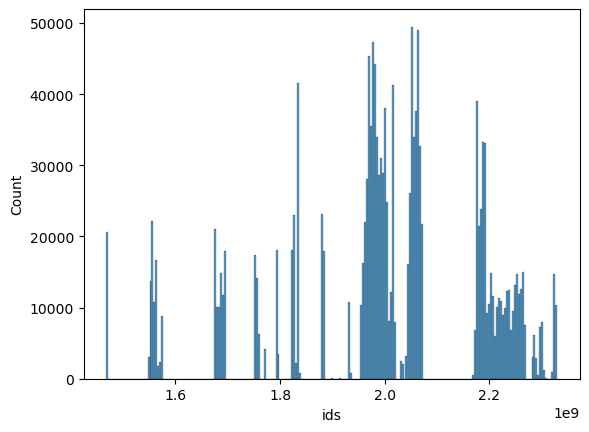

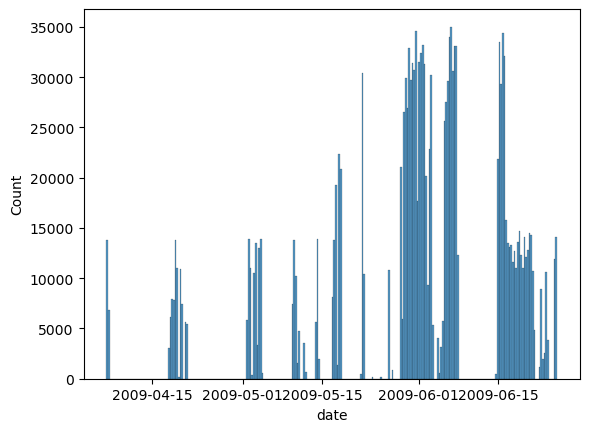

In [29]:
for feature in quantitative:
    sns.histplot(df[feature])
    plt.show()

Lets visualize the distribution between the variables

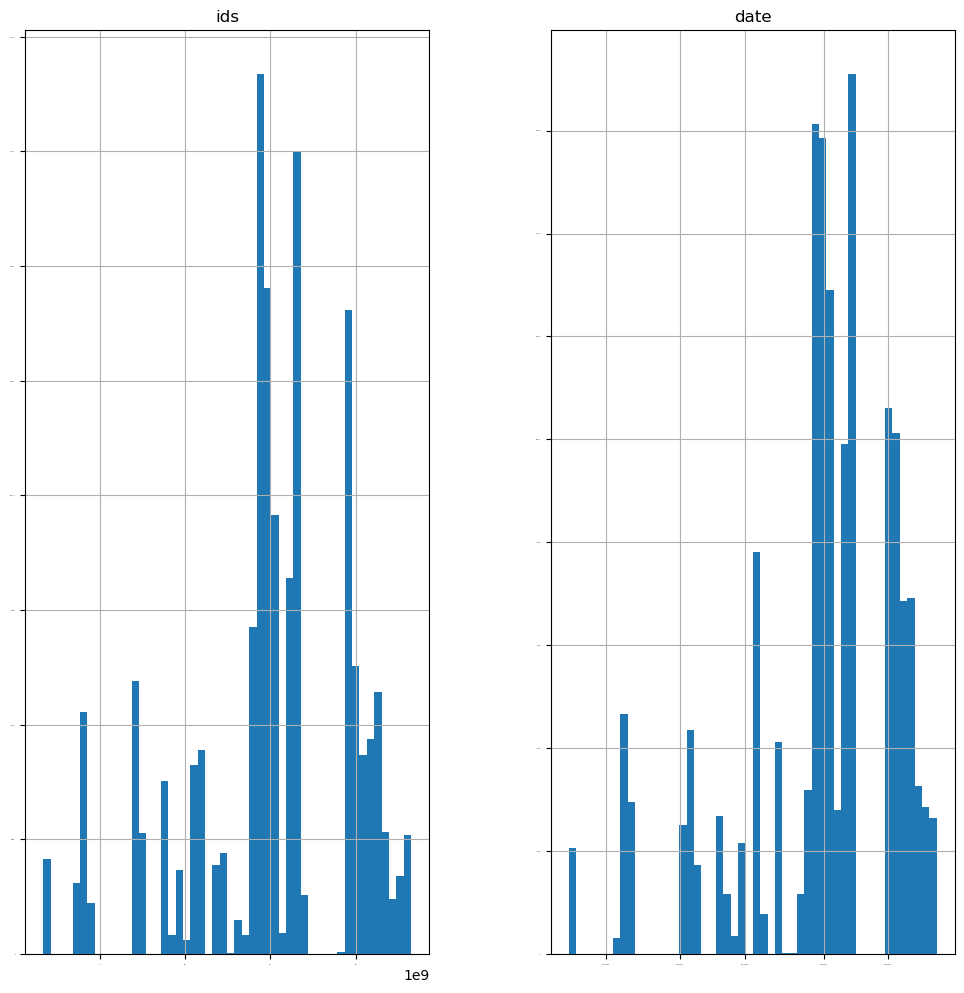

In [30]:
df.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

### Visualisations

Top 10 tweets - Pie Chart

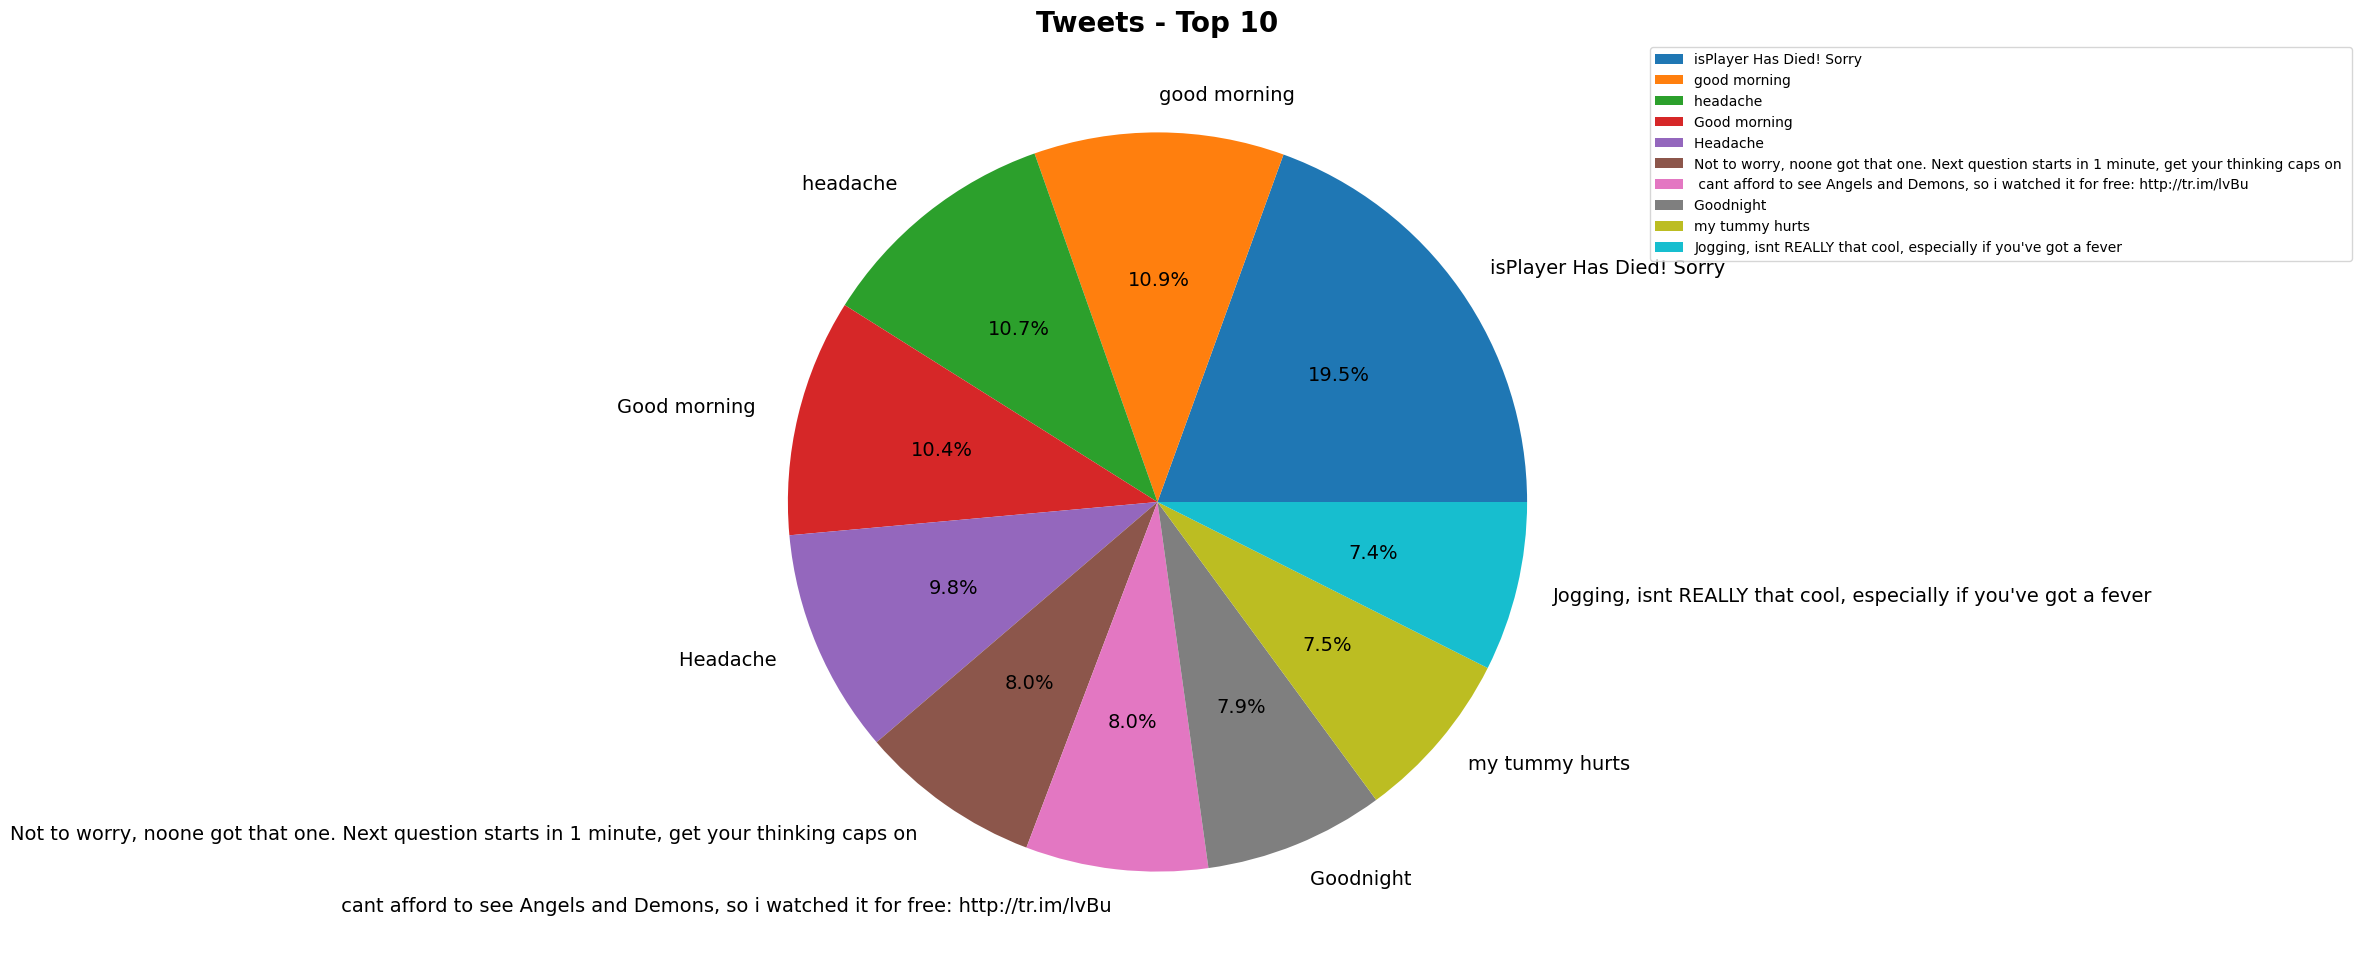

In [31]:
plt.figure(figsize=(16,12))
ax = df['text'].value_counts().nlargest(10).plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Tweets - Top 10", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Pairplot

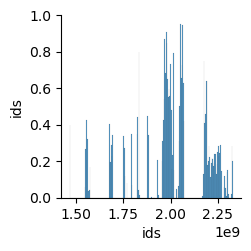

In [32]:
sns.pairplot(df);

### Statistical Summary of Numerical Features

In [33]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ids,1599999.0,1998817884.175324,1467810672.0,1956915875.5,2002101858.0,2177059165.5,2329205794.0,193575678.917282
date,1599999,2009-05-31 07:26:27.994492416,2009-04-06 22:19:49,2009-05-28 23:01:17.500000,2009-06-02 03:08:55,2009-06-15 05:21:43.500000,2009-06-25 10:28:31,NaN


#### Seaborn Pairplot (all numerical features):

In order to create our scatterplot pairplot, we use the .pairplot() function from the seaborn library (Waskom, n.d.b). We can clearly see that there are no linear relationships between the numerical features in our DataFrame in the pairplot.

<Figure size 1500x1200 with 0 Axes>

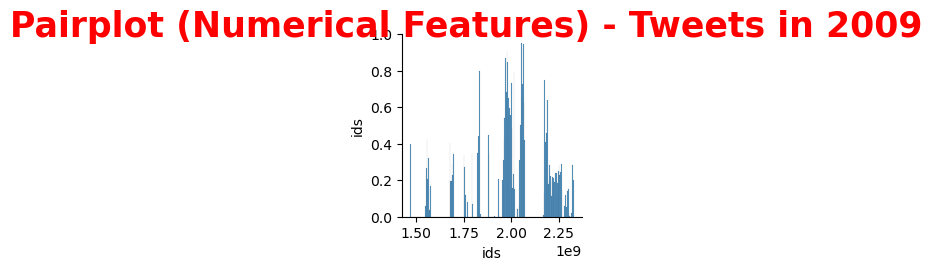

In [34]:
plt.figure(figsize=(15,12))
g = sns.pairplot(df)
g.fig.suptitle('Pairplot (Numerical Features) - Tweets in 2009\n',
               color='red',
               fontsize=25,
               fontweight='bold',
               y=1.04)
plt.show();

### Statistical Summary of Categorical Features

In [35]:
df.describe(include=object).T

,count,unique,top,freq
user,1599999,659775,lost_dog,549
text,1599999,1581465,isPlayer Has Died! Sorry,210


## Sentiment Analysis

Now I will consider the first tweet for sentiment analysis, taking into cosideration that inside a tweet, there are several categories, such as user, text, emojis, links and user

For analysis, I will preprocess the text to analyse the way the model is trained.
the way the tweeter model is used is by using @user to mention a user and instead of hyperlink, just write http

### Preprocess tweet

In [36]:
tweet = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [37]:
tweet_words = []

In [38]:
for word in tweet.split(' '):
    if word.startswith('@') and len(word) >1:
        word = '@user'
        
    elif word.startswith('http'):
        word = 'http'
    tweet_words.append(word)
    
print(tweet_words)

['@user', 'http', '-', 'Awww,', "that's", 'a', 'bummer.', '', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it.', ';D']


In [39]:
tweet_proc = ' '.join(tweet_words)
print(tweet_proc)

@user http - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [40]:
roberta = 'cardiffnlp/twitter-roberta-base-sentiment'

In [41]:
model = AutoModelForSequenceClassification. from_pretrained(roberta)

In [42]:
tokenizer = AutoTokenizer.from_pretrained(roberta)

Now I will make a list of the labels

In [43]:
labels = ['Negative', 'Neutral', 'Positive']

Now I will write the coode for tweet sentiment analysis

I will convert the tweet into pytorch tensors and then pass into the model

In [44]:
encoded_tweet = tokenizer(tweet_proc, 
                          return_tensors='pt')

In [45]:
print(encoded_tweet)

{'input_ids': tensor([[    0,  1039, 12105,  2054,   111,    83,  1401,     6,    14,    18,
            10,   741, 22539,     4,  1437,   370,   197,   102,   300,   871,
          8902,     9,  7470,  1053,     7,   109,    24,     4, 25606,   495,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


We can see that the encoded tweet is a dictionary with the tensor and attention mask

Now I will pass the encoded tweet into the model to do the sentiment analysis

In [46]:
output = model(encoded_tweet['input_ids'],
              encoded_tweet['attention_mask'])
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.1066,  0.4083, -1.4245]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [47]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(scores)

[0.63412744 0.31541547 0.0504571 ]


I got the probabilities and now will print the output with corresponding labels

In [48]:
for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)
    

Negative 0.63412744
Neutral 0.31541547
Positive 0.050457098


I will now use a prebuilt sentiment analysis tool in this case TextBlob to perform sentiment analysis in the column text

In [49]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [50]:
df['sentiment'] = df['text'].apply(analyze_sentiment)

In [51]:
df

,ids,date,user,text,sentiment
0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,0.000
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,0.500
2,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,0.200
3,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",-0.625
4,1467811372,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,0.200
...,...,...,...,...,...
1599994,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...,1.000
1599995,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,0.290
1599996,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,0.200
1599997,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1.000


Lets analyse the new column sentiment

In [52]:
print(df['sentiment'].describe())


count    1.599999e+06
mean     1.022887e-01
std      3.523513e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e-01
max      1.000000e+00
Name: sentiment, dtype: float64


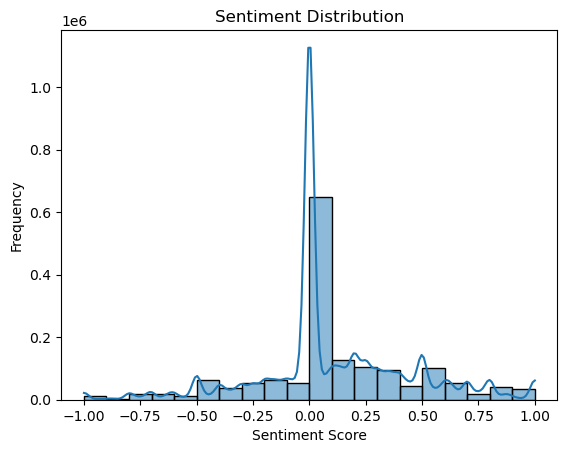

In [53]:
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Accordint to this results, we can see that the highest amounts of tweets are 0 or neutral, but further analysis will investigate that

I will now define a function to categorize the column sentiment into positive, negative and neutral

In [54]:
df['category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [55]:
df.category.value_counts()

category
positive    698006
neutral     568723
negative    333270
Name: count, dtype: int64

Lets see 1 tweet foe each sentiment

In [56]:
display(df[df["category"] == 'positive'].head(1))
display(df[df["category"] == 'neutral'].head(1))
display(df[df["category"] == 'negative'].head(1))

,ids,date,user,text,sentiment,category
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,0.5,positive


,ids,date,user,text,sentiment,category
0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,0.0,neutral


,ids,date,user,text,sentiment,category
3,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",-0.625,negative


Next, I will count the number of tweets that are positive, negative and neutral:

In [57]:
sentiment_counts = df.groupby(['category']).size()
print(sentiment_counts)

category
negative    333270
neutral     568723
positive    698006
dtype: int64


In [58]:
category_counts = df['category'].value_counts()

In [59]:
category_counts

category
positive    698006
neutral     568723
negative    333270
Name: count, dtype: int64

We can see that most tweets are positive

Lets visualize the count of tweets sentiment in a histogram

Text(0.5, 1.0, 'Dataset labels distribuition')

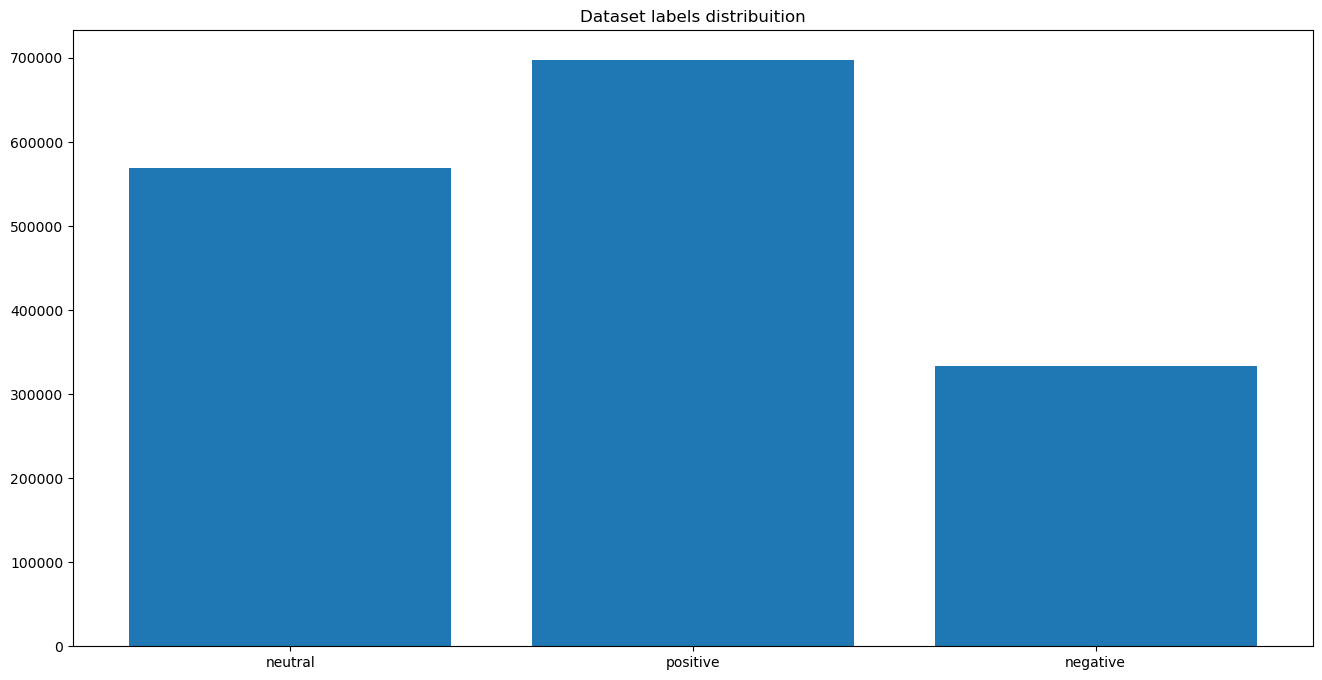

In [60]:
target_cnt = Counter(df.category)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

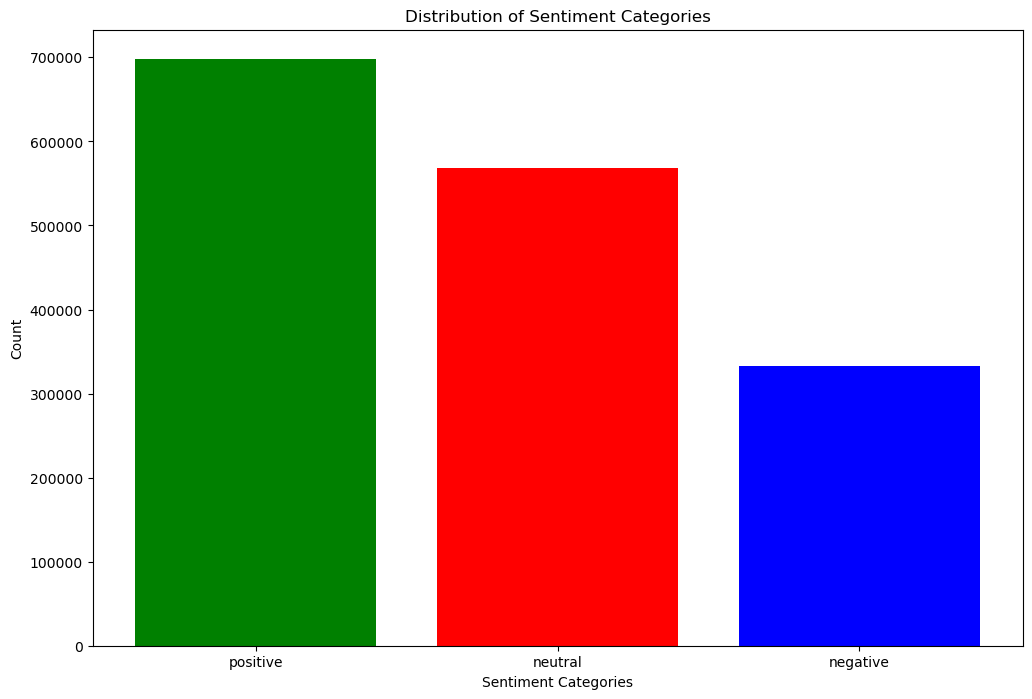

In [61]:
class_count = df['category'].value_counts()

plt.figure(figsize=(12, 8))
tick_locations = [0, 1, 2]
tick_labels = ['positive', 'neutral', 'negative']
plt.xticks(tick_locations, tick_labels)
plt.bar(x=tick_locations, height=class_count.values, color=['g', 'r', 'b'])
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories')
plt.show()

## Text Preprocessing

I will now use stop words to filter out common and non-informative words from text data.

These words are words considered to have little or no value in terms of the meaning of the text

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edmun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


I will apply stop words to the column text to remove stop words

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)


In [ ]:
df['text']=df['text'].str.lower()
df['text'].head()

I will now clean and remove punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: remove_punctuations(x))
df['text'].tail()

Cleaning and removing repeating characters

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: remove_repeating_char(x))
df['text'].tail()

Removing URLS

In [ ]:
def remove_URLs(df):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',df)
df['text'] = df['text'].apply(lambda x: remove_URLs(x))
df['text'].tail()

 Cleaning and removing numeric numbers

In [ ]:
def remove_numbers(df):
    return re.sub('[0-9]+', '', df)
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['text'].tail()

In [ ]:
df

I have removed all stop words from text column

## Plotting the Time series 

Selecting the features only required for the time series analysis. I dont need the entire dataset. Hence, irrelevant columns are dropped or preselected, this will reduce complexity and noise during the analysis. This project will forecast the number of tweets at Week 1, Month 1 and Month 3

In [ ]:
df_time_series = df[['date','text','category']]

In [ ]:
df_time_series.tail(10)

In [ ]:
df_time_series.info()

In [ ]:
df_resampled = df_time_series.loc[df_time_series['date']<='2009/12/31'][['date', 
                'text']].groupby(by='date').sum().reset_index()

Check Stationary Augmented Dickey-Fuller test

In [ ]:
ad_fuller_result2 = adfuller(df_resampled['text'])

print('Augmented Dickey-Fuller')
print('ADF statistic: {:.4f}'.format(result[0]))
print('P-value: {:.4f}'.format(result[1]))
print('Critical values:')
for key, value in result[4].items():
    print('\t{}: {:.4f}'.format(key, value))